# Assignment 4

### This Assignment is due by 11:59 pm EDT March 5. Type your solution in the cells following '# your code is here'. Please, upload your solution to a corresponding Dropbox on LEARN.

#### In all the problems below, you can use either 'RK4' program from the lectures, or 'solve_ivp', or 'odeint' routine from the scipy.integrate module.

### Problem 1: A low-pass filter

Here is a simple electronic circuit with one resistor and one capacitor.

<div>
<img src="attachment:lowpass.png" width="300"/>
</div>


This circuit acts as a low-pass filter: you send a signal in on the left
and it comes out filtered on the right.

Using Ohm's law and the capacitor law and assuming that the output load has
very high impedance, so that a negligible amount of current flows through
it, we can write down the equations governing this circuit as follows.  Let
$I$ be the current that flows through~$R$ and into the capacitor, and let
$Q$ be the charge on the capacitor.  Then:

$$
IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
 Q = CV_\textrm{out}\,,\qquad
 I = \frac{dQ}{d t}.
$$

Substituting the second equation into the third, then substituting the
result into the first equation, we find that $V_\textrm{in} -
V_\textrm{out} = RC\>(d V_\textrm{out}/dt)$, or equivalently

$$
\frac{d V_\textrm{out}}{dt} = {1\over RC}
                               \bigl( V_\textrm{in} - V_\textrm{out} \bigr).
$$

Write a program to solve this equation for $V_\textrm{out}(t)$ using the fourth-order 
Runge--Kutta method when the input signal is a square-wave with frequency $1$ and amplitude $1$:

\begin{equation}
V_\textrm{in}(t) = \begin{cases}
                     1  & \qquad\mbox{if $\lfloor 2t \rfloor$ is even,} \\
                     -1 & \qquad\mbox{if $\lfloor 2t \rfloor$ is odd,}
                   \end{cases}
\end{equation}

$\lfloor x\rfloor$ means $x$ rounded down to the next lowest integer. Use the program to make plots of the output of the filter circuit from $t=0$ to $t=10$ when $RC=0.03$, $0.15$, and $0.75$, with initial condition $V_\textrm{out}(0)=0$.  You should put all three plots in one graph.
You will have to make a decision about what value of $h$ to use in your calculation. Because you need to solve the system of ODE for three values for $RC$, put your vector function $\mathbf{f}$ in a class, as you saw in the lectures.

A program similar to the one you wrote is running inside most stereos and
music players, to create the effect of the "bass" control.  In the old
days, the bass control on a stereo would have been connected to a real
electronic low-pass filter in the amplifier circuitry, but these days there
is just a computer processor that simulates the behavior of the filter in a
manner similar to your program.

In [2]:
# your code is here
from math import floor
import numpy as np
import scipy.integrate as ode
import matplotlib.pyplot as plt

#general ODE class to reuse during this assignment
class Ode:
    def __init__(self, f, y0, h, ti, tf):

        self.y0 = y0
        self.ts = np.arange(ti,tf,h)

    #method to solve an IVP for the ODE that is passed
    def solve(self):
        return ode.odeint(self.f,self.y0, self.ts)
    
    #method to plot the resulting ODE
    def ploty(self,label):
        plt.plot(self.ts, self.solve(), label = label)
        

#low pass class to solve IVP for low pass systems as described in the question
class LowPass(Ode):
    def __init__(self, RC , h = 0.001, ti = 0.0, tf = 10.0, V0 = 0):
        self.RC = RC
        Ode.__init__(self, self.fv, V0, h, ti, tf)
    
    #note that for calculating Vin, we use inline if statement with the syntax <expression_true> if <condition> else <expression_false>
    def fv(self, y,t):
        Vout = y[0]
        return np.array([1/self.RC * ((1 if floor(2*t) % 2 == 0 else -1)-Vout)])
#creating instances with the appropriate values for RC 
RC1 = LowPass(0.03)
RC2 = LowPass(0.15)
RC3 = LowPass(0.75)

RC1.ploty("RC = "+str(RC1.RC))
RC2.ploty("RC = "+str(RC2.RC))
RC3.ploty("RC = "+str(RC3.RC))
plt.title("Vout as a function of time")
plt.ylabel("Vout")
plt.xlabel("Time")
plt.legend(bbox_to_anchor = (1,1))
plt.show()


AttributeError: 'LowPass' object has no attribute 'f'

###  Problem 2: Radioactive Decays

Consider a system of a parent nucleus, $P$, and a daughter nucleus $D$, both radioactive. The coupled equations which describe their decays are as follows:

$$
\frac{dN_P}{dt}= -k_P N_P(t),
$$
$$
\frac{dN_D}{dt}= k_P N_P(t) - k_D N_D(t).
$$

Write a  program to numerically solve the above coupled equations and plot the time dependence of $N_P$ and $N_D$ for $k_P=0.5 s^{-1}$ and $k_D = 5.0s^{-1}$, $0.5 s^{-1}$, and $0.05 s^{-1}$.
Assume you start out with the number of parent nuclei equal to $100$ and no daughter nuclei. The interval for $t$ is $0<t<15$ seconds. 
Graph all results overlaid on one figure. Your graph should contain four plots. Label them neatly and appropriately.
Because you need to solve the system of ODE for three pairs of values for $k_P$ and $k_D$, put your vector function $\mathbf{f}$ in a class, as you saw in the lectures.

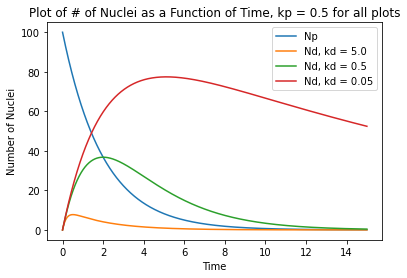

In [ ]:
# your code is here

class RadioactiveDecays(Ode):
    def __init__(self, kd, kp = 0.5, initcond = (100.0,0.0), h = 0.001, ti = 0.0, tf = 15.0):
        self.kp = kp
        self.kd = kd
        Ode.__init__(self, self.f, initcond, h, ti, tf)

    def f(self,y,t):
        P = y[0]
        D = y[1]
        return np.array([-self.kp*P, self.kp*P-self.kd*D])
    def ploty(self,label, i):
        plt.plot(self.ts, self.solve()[:,i], label = label)    

kd1 = RadioactiveDecays(5.0)
kd2 = RadioactiveDecays(0.5)
kd3 = RadioactiveDecays(0.05)
kd1.ploty("Np",0)
kd1.ploty("Nd, kd = " + str(kd1.kd),1)
kd2.ploty("Nd, kd = " + str(kd2.kd),1)
kd3.ploty("Nd, kd = " + str(kd3.kd),1)
plt.xlabel("Time")
plt.ylabel("Number of Nuclei")
plt.title("Plot of # of Nuclei as a Function of Time, kp = 0.5 for all plots")
plt.legend()
plt.show()


### Problem 3: Phase Space Plots and Anharmonic Oscillators

a) The linear second-order ODE describing the motion of a harmonic oscillator is given by

$$
\frac{d^2 x}{dt^2} = -\omega^2 x.
$$

while equations of motion for anharmonic oscillators can be much more diverse and complicated. Let's consider, for example, the following form:

$$
\frac{d^2 x}{dt^2} = -\omega^2 x^3.
$$

Instead of plotting $x$ against $t$, one can plot $dx/dt$ against $x$, 
i.e., the velocity of the oscillator against its position. Such a plot is called a *phase space* plot.

Take $\omega=1$ and initial conditions $x=1$ and $dx/dt=0$ to solve both equations presented above. $t$ is in the range from $t=0$ to $t=50$. Make the phase space plots for both cases, and put them in one figure. Again put your vector function $\mathbf{f}$ in classes.

b) The *van der Pol oscillator*, which appears in electronic circuits and in laser physics, is described by the equation

$$
\frac{d^2 x}{dt^2} - \mu (1-x^2) \frac{dx}{dt} + \omega^2 x = 0.
$$

Solve this equation from $t=0$ to $t=20$ and hence make a *phase space* plot for the van der Pol oscillator with $\omega=1$,
$\mu=0.2$, and initial conditions $x=1$ and $dx/dt=0$.  Do the same also for $\mu=0.8$ and $\mu=2.5$ (still with $\omega=1$). Do not put everything on one plot; you should produce three different plots in this part. As usual, put your vector function $\mathbf{f}$ representing the righthand side of ODE's in a class.

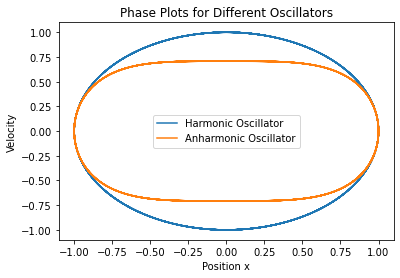

In [ ]:
# your code is here
class HarmonicOscillator(Ode):
    def __init__(self, w = 1.0, y0 = (1.0,0.0), h = 0.001, ti = 0.0, tf = 50.0):
        self.w = w
        Ode.__init__(self, self.f, y0, h, ti, tf)

    def f(self,y,t):
        x = y[0]
        v = y[1]
        return np.array([v,-self.w**2*x])

    def phaseplot(self, label):
        v = self.solve()[:,1]
        x = self.solve()[:,0]
        plt.plot(x,v, label = label)


class AnharmonicOsccilator(HarmonicOscillator):
    def __init__(self):
       HarmonicOscillator.__init__(self)

    def f(self, y, t):
        x = y[0]
        v = y[1]
        return(v, -self.w**2*x**3)




harmonic = HarmonicOscillator()
harmonic.phaseplot("Harmonic Oscillator")
anharmonic = AnharmonicOsccilator()
anharmonic.phaseplot("Anharmonic Oscillator")
plt.xlabel("Position x")
plt.ylabel("Velocity")
plt.title("Phase Plots for Different Oscillators")
plt.legend()
plt.show()

In [ ]:
class VanDerPol(HarmonicOscillator):
    def __init__(self, u, w = 1.0, y0 = (1.0,0.0), h = 0.001, ti = 0.0, tf = 20):
        self.u = u
        HarmonicOscillator.__init__(self, w, y0, h, ti, tf)
    def f(self, y, t):
        x = y[0]
        v = y[1]
        return np.array([v, -self.w**2*x+self.u*(1-x**2)*v])

vdp1 = VanDerPol(0.2)
vdp2 = VanDerPol(0.8)
vdp3 = VanDerPol(2.5)

vdp1.phaseplot("u = 0.2")
vdp2.phaseplot("u = 0.8")
vdp3.phaseplot("u = 2.5")
plt.xlabel("Position x")
plt.ylabel("Velocity")
plt.title("van der Pol Oscillators for different values of u")
plt.legend()
plt.show()

NameError: name 'HarmonicOscillator' is not defined

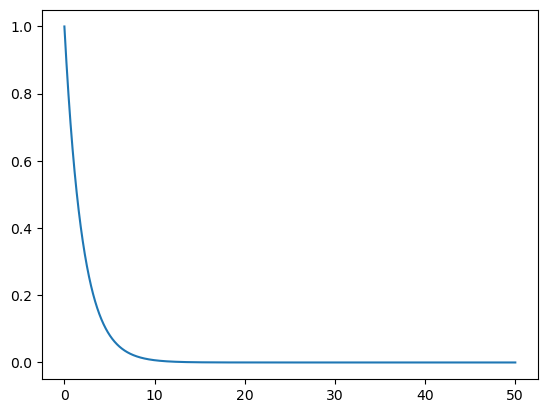

In [13]:
from math import floor
import numpy as np
import scipy.integrate as ode
import matplotlib.pyplot as plt

#general ODE class to reuse during this assignment
class Ode:
    def __init__(self, f, y0, h, ti, tf):
        self.f = f
        self.y0 = y0
        self.ts = np.arange(ti,tf,h)

    #method to solve an IVP for the ODE that is passed
    def solve(self):
        return ode.odeint(f,self.y0, self.ts)
    
    #method to plot the resulting ODE
    def ploty(self,label):
        plt.plot(self.ts, self.solve()[:,0], label = label)

def f( y, t, kd = 5.0, kp = 0.5):
    #DE for the nuclear decay problem
    P = y[0]
    D = y[1]
    return np.array([-kp*P, kp*P-kd*D])

ODE = Ode(f, (1.0,0.0), 0.001, 0.0, 50.0)
ODE.ploty("x(t)")